In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
cv_analytics_utils: Dict[str, CvAnalyticsUtil] = {}

In [4]:
for filesuffix in filesuffixes:
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    print(filesuffix)
    cv_analytics_utils[filesuffix] = cv_analytics_util

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
_for_experiment_partic

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.03333333333333333


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 0.999848  | 0.000112518 | 0.999636  | 1         |
| recall__class_0    | 0.971139  | 0.00327458  | 0.964782  | 0.977472  |
| f1-score__class_0  | 0.985282  | 0.00169073  | 0.981942  | 0.988563  |
| precision__class_1 | 0.0209288 | 0.00489413  | 0.0125    | 0.0305344 |
| recall__class_1    | 0.80463   | 0.148057    | 0.555556  | 1         |
| f1-score__class_1  | 0.040779  | 0.00944216  | 0.0245098 | 0.0590406 |
| accuracy           | 0.971013  | 0.00328196  | 0.96454   | 0.977402  |
| auc                | 0.939821  | 0.0507828   | 0.828382  | 0.997804  |
+--------------------+-----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


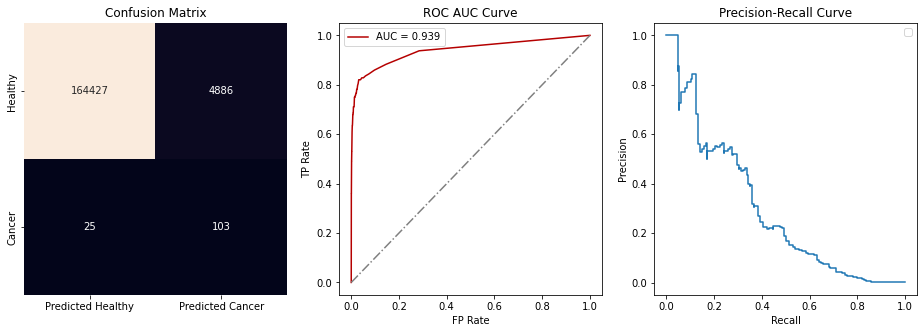

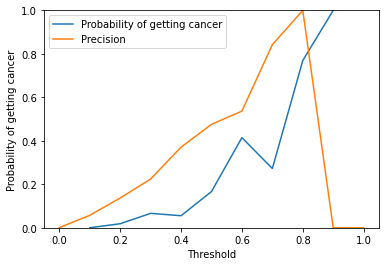

_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.01


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999745  | 0.000247283 | 0.999023   | 1         |
| recall__class_0    | 0.897858  | 0.00519034  | 0.890463   | 0.910986  |
| f1-score__class_0  | 0.946058  | 0.00279486  | 0.94197    | 0.952976  |
| precision__class_1 | 0.005116  | 0.00247852  | 0.00162206 | 0.0120482 |
| recall__class_1    | 0.700014  | 0.220904    | 0.230769   | 1         |
| f1-score__class_1  | 0.0101493 | 0.0048949   | 0.00323363 | 0.0238095 |
| accuracy           | 0.897704  | 0.00504103  | 0.890364   | 0.910199  |
| auc                | 0.871921  | 0.0794006   | 0.763648   | 0.992427  |
+--------------------+-----------+----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


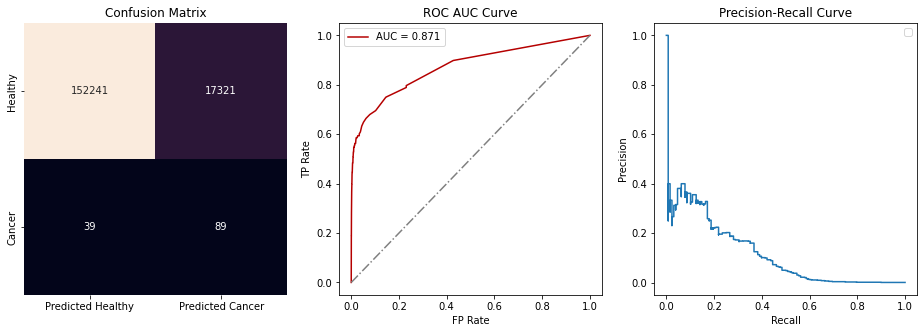

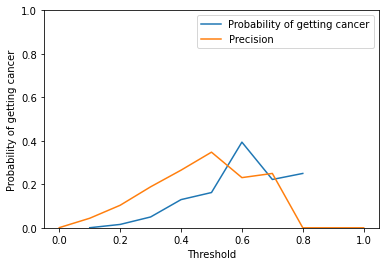

_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.048501736512811165


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998879   | 0.000145171 | 0.998688   | 0.999112   |
| recall__class_0    | 0.714058   | 0.00740185  | 0.703125   | 0.730655   |
| f1-score__class_0  | 0.832769   | 0.00502711  | 0.825258   | 0.844046   |
| precision__class_1 | 0.00170396 | 0.000360624 | 0.00124505 | 0.00233209 |
| recall__class_1    | 0.378455   | 0.0796702   | 0.268293   | 0.512195   |
| f1-score__class_1  | 0.00339264 | 0.000717953 | 0.00247859 | 0.00464199 |
| accuracy           | 0.713626   | 0.00738754  | 0.702624   | 0.730342   |
| auc                | 0.56191    | 0.0536008   | 0.465731   | 0.646118   |

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


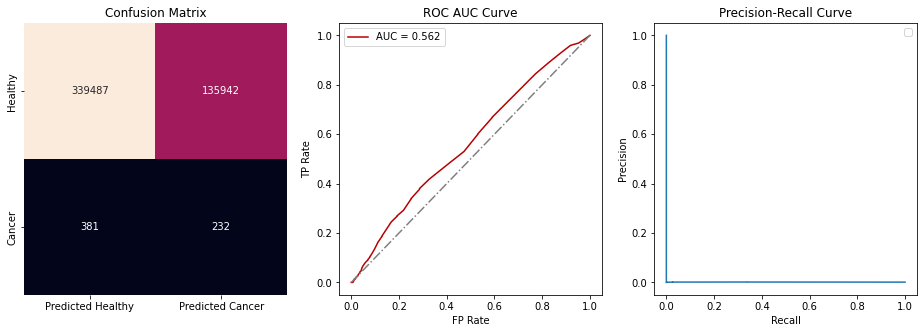

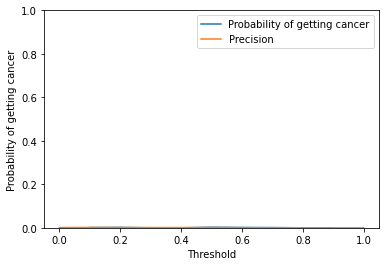

_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.00812582764774561


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999855   | 0.000111832 | 0.999624   | 1         |
| recall__class_0    | 0.930642   | 0.00871412  | 0.917739   | 0.942784  |
| f1-score__class_0  | 0.963988   | 0.00463895  | 0.957105   | 0.970505  |
| precision__class_1 | 0.00889888 | 0.0014945   | 0.00636943 | 0.0122511 |
| recall__class_1    | 0.82037    | 0.14149     | 0.555556   | 1         |
| f1-score__class_1  | 0.0176024  | 0.00294158  | 0.0126103  | 0.0241692 |
| accuracy           | 0.930559   | 0.00863916  | 0.917797   | 0.942741  |
| auc                | 0.94024    | 0.0429984   | 0.873529   | 0.998799  |
+-------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


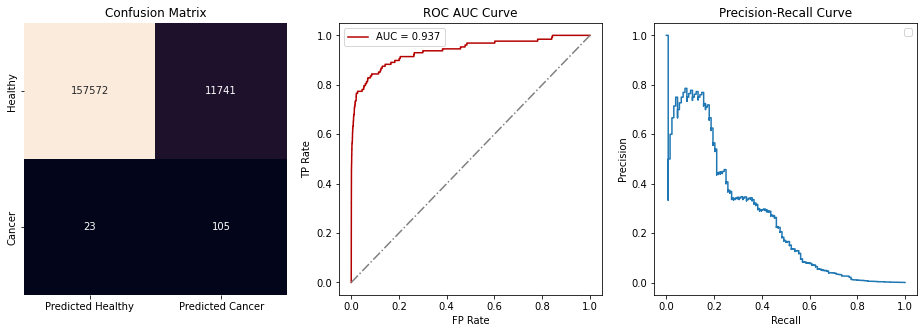

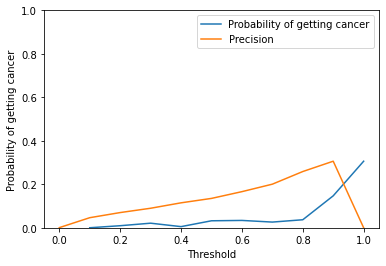

_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.03292454406619072


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999685   | 0.000196246 | 0.999154   | 0.999905  |
| recall__class_0    | 0.932444   | 0.00890162  | 0.919731   | 0.947518  |
| f1-score__class_0  | 0.964873   | 0.00469675  | 0.958099   | 0.972652  |
| precision__class_1 | 0.00698692 | 0.00341043  | 0.00233372 | 0.0142653 |
| recall__class_1    | 0.612047   | 0.176122    | 0.307692   | 0.888889  |
| f1-score__class_1  | 0.0137883  | 0.00667261  | 0.00464576 | 0.027972  |
| accuracy           | 0.932199   | 0.00877564  | 0.91961    | 0.946778  |
| auc                | 0.830646   | 0.0963299   | 0.659181   | 0.955348  |
+--------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


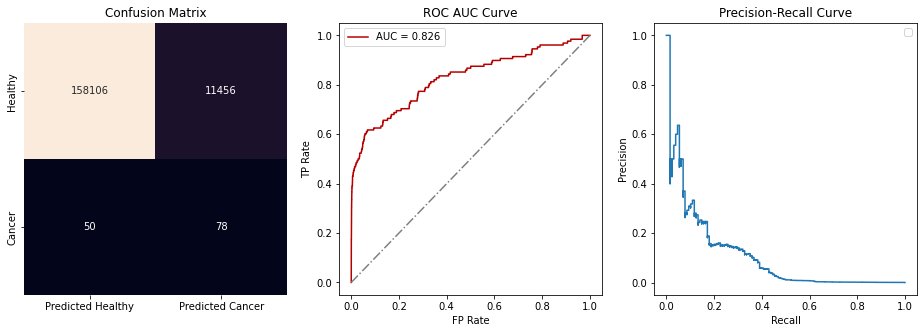

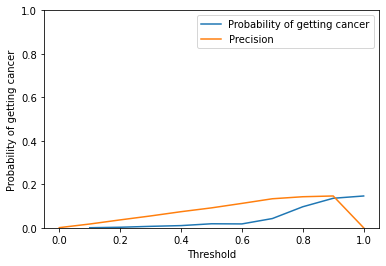

_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.12346095591783524


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.999232   | 0.000335373 | 0.998675   | 0.99988    |
| recall__class_0    | 0.261085   | 0.0141373   | 0.234687   | 0.286653   |
| f1-score__class_0  | 0.413811   | 0.017778    | 0.380107   | 0.445492   |
| precision__class_1 | 0.00146931 | 0.000128588 | 0.00123588 | 0.00170061 |
| recall__class_1    | 0.843049   | 0.0726022   | 0.725      | 0.97561    |
| f1-score__class_1  | 0.00293351 | 0.000256709 | 0.00246756 | 0.0033953  |
| accuracy           | 0.261835   | 0.0140869   | 0.235524   | 0.287323   |
| auc                | 0.566404   | 0.067089    | 0.468181   | 0.65314    |
+--------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


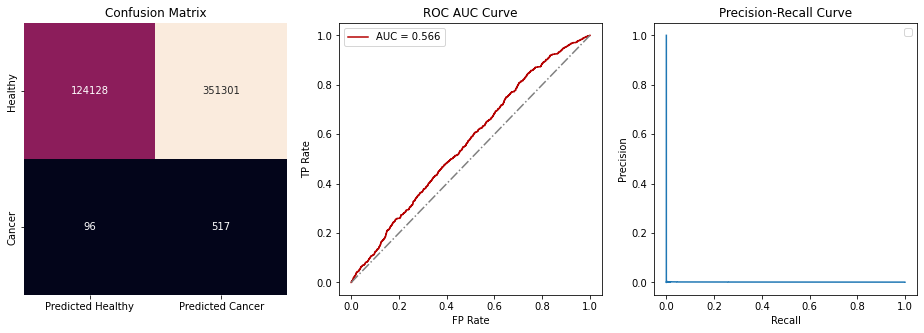

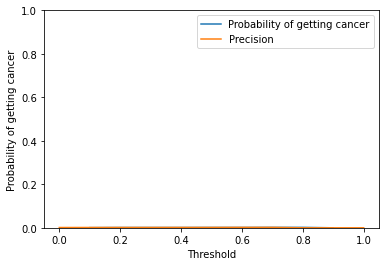

_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.023333333333333334


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 0.999854  | 0.000102418 | 0.999726  | 1         |
| recall__class_0    | 0.967694  | 0.00306887  | 0.96184   | 0.972937  |
| f1-score__class_0  | 0.983509  | 0.00157813  | 0.98046   | 0.986195  |
| precision__class_1 | 0.018825  | 0.00379714  | 0.0126904 | 0.0241692 |
| recall__class_1    | 0.812037  | 0.137078    | 0.625     | 1         |
| f1-score__class_1  | 0.0367832 | 0.00735675  | 0.0248756 | 0.0470588 |
| accuracy           | 0.967577  | 0.0030517   | 0.961689  | 0.972783  |
| auc                | 0.931764  | 0.0587282   | 0.801727  | 0.997237  |
+---------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


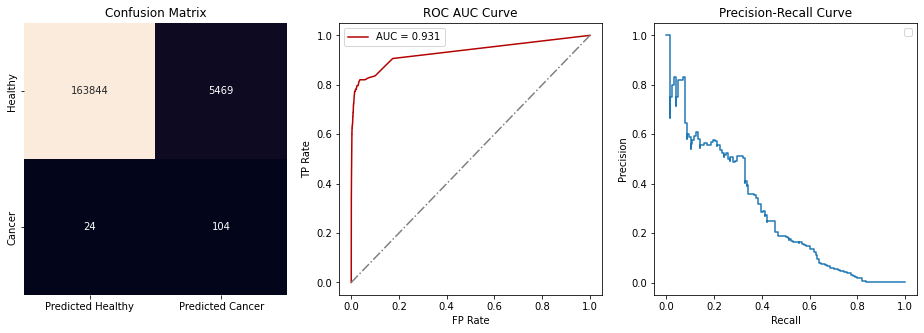

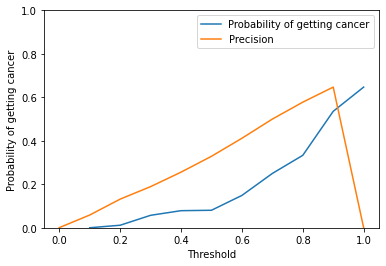

_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.03333333333333333


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 0.999849  | 9.49814e-05 | 0.999724  | 1         |
| recall__class_0    | 0.975054  | 0.00248894  | 0.969597  | 0.979424  |
| f1-score__class_0  | 0.987294  | 0.00127443  | 0.98443   | 0.98956   |
| precision__class_1 | 0.0240168 | 0.00473398  | 0.0144509 | 0.0333333 |
| recall__class_1    | 0.803704  | 0.128357    | 0.625     | 1         |
| f1-score__class_1  | 0.0466206 | 0.00908573  | 0.0282486 | 0.064257  |
| accuracy           | 0.974925  | 0.00248267  | 0.969351  | 0.979351  |
| auc                | 0.938647  | 0.0564788   | 0.836743  | 0.998555  |
+----------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


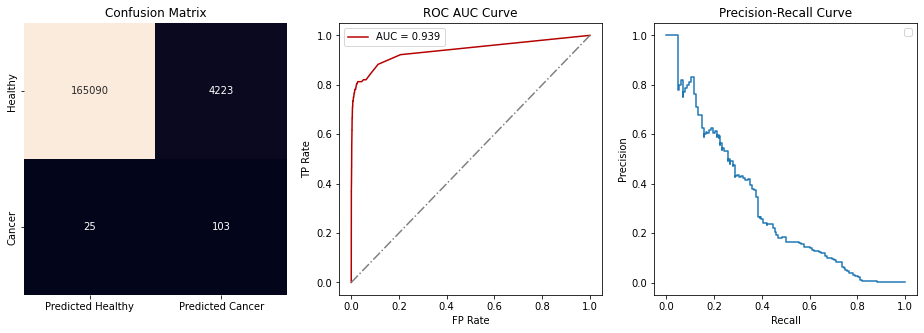

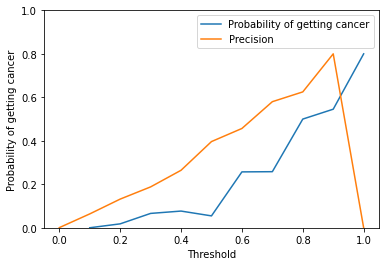

_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.01


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999719   | 0.000206029 | 0.999116   | 1         |
| recall__class_0    | 0.903133   | 0.00328068  | 0.898286   | 0.909639  |
| f1-score__class_0  | 0.948972   | 0.00177664  | 0.94633    | 0.952505  |
| precision__class_1 | 0.00515366 | 0.0023071   | 0.00172563 | 0.010582  |
| recall__class_1    | 0.661359   | 0.196839    | 0.307692   | 1         |
| f1-score__class_1  | 0.0102199  | 0.00455628  | 0.00343938 | 0.0209059 |
| accuracy           | 0.902952   | 0.00321869  | 0.898146   | 0.909364  |
| auc                | 0.845968   | 0.0895577   | 0.71359    | 0.990196  |
+----------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


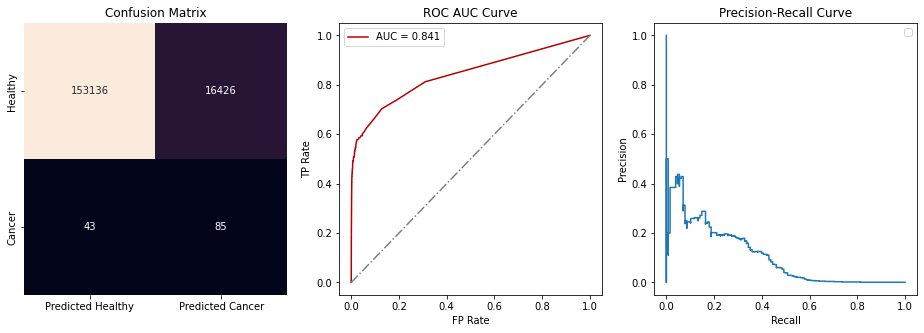

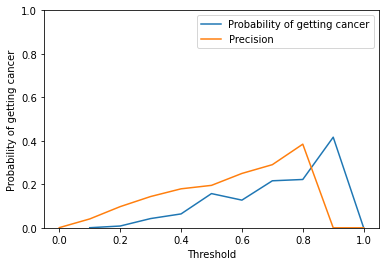

_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.016666666666666666


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999704   | 0.000234269 | 0.999052   | 1         |
| recall__class_0    | 0.937989   | 0.00290403  | 0.933776   | 0.942855  |
| f1-score__class_0  | 0.967862   | 0.0015389   | 0.965666   | 0.970498  |
| precision__class_1 | 0.00770172 | 0.00366758  | 0.00269542 | 0.0168539 |
| recall__class_1    | 0.641046   | 0.206464    | 0.230769   | 1         |
| f1-score__class_1  | 0.0152013  | 0.0071904   | 0.00536193 | 0.0330579 |
| accuracy           | 0.937759   | 0.002894    | 0.933634   | 0.942718  |
| auc                | 0.855058   | 0.0916313   | 0.723986   | 0.99103

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


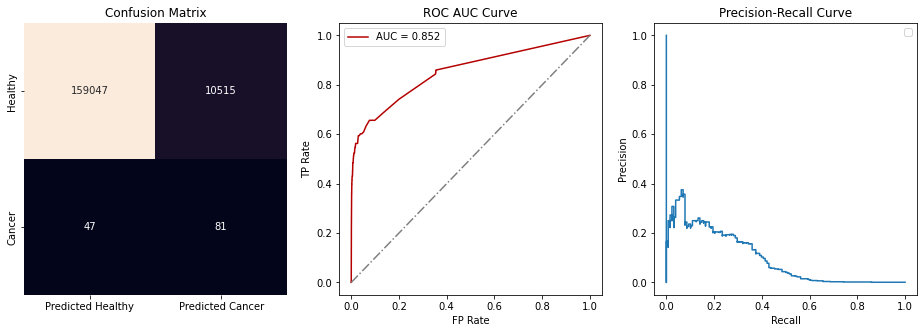

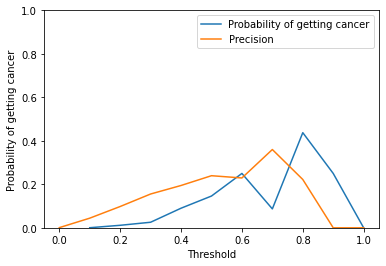

_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.028909090909090905


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998978   | 0.000184971 | 0.998602   | 0.999202   |
| recall__class_0    | 0.451167   | 0.0125222   | 0.428073   | 0.473859   |
| f1-score__class_0  | 0.621505   | 0.0118487   | 0.599353   | 0.642729   |
| precision__class_1 | 0.00150257 | 0.000148045 | 0.0011994  | 0.0016757  |
| recall__class_1    | 0.641138   | 0.0698167   | 0.487805   | 0.731707   |
| f1-score__class_1  | 0.00299811 | 0.000295452 | 0.00239292 | 0.00334374 |
| accuracy           | 0.451412   | 0.0124547   | 0.428432   | 0.473877   |
| auc                | 0.543256   | 0.050374    | 0.420074 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


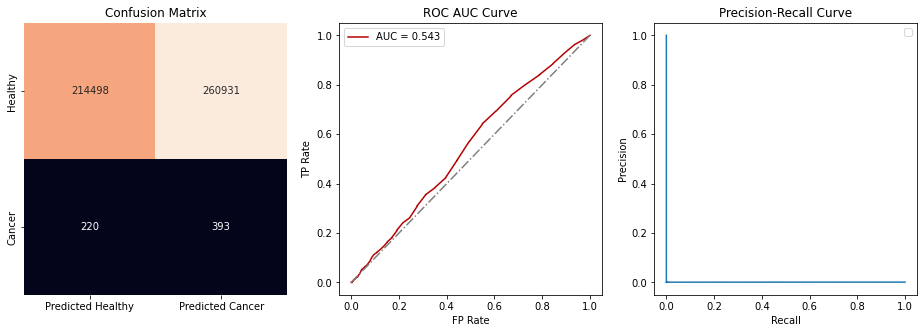

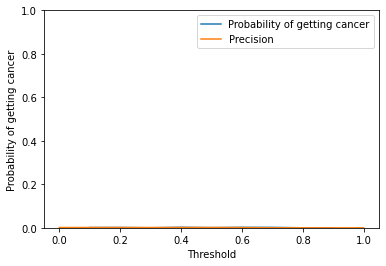

_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.035055555555555555


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998917   | 0.000222648 | 0.998639   | 0.99938    |
| recall__class_0    | 0.54553    | 0.0113125   | 0.525201   | 0.568058   |
| f1-score__class_0  | 0.705611   | 0.00945799  | 0.688471   | 0.724274   |
| precision__class_1 | 0.00153524 | 0.000275248 | 0.00116502 | 0.00213402 |
| recall__class_1    | 0.541545   | 0.0947888   | 0.414634   | 0.731707   |
| f1-score__class_1  | 0.00306179 | 0.000548882 | 0.00232367 | 0.00425562 |
| accuracy           | 0.545525   | 0.0113006   | 0.52531    | 0.568048   |
| auc                | 0.553623   | 0.0588971   | 0.444821 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


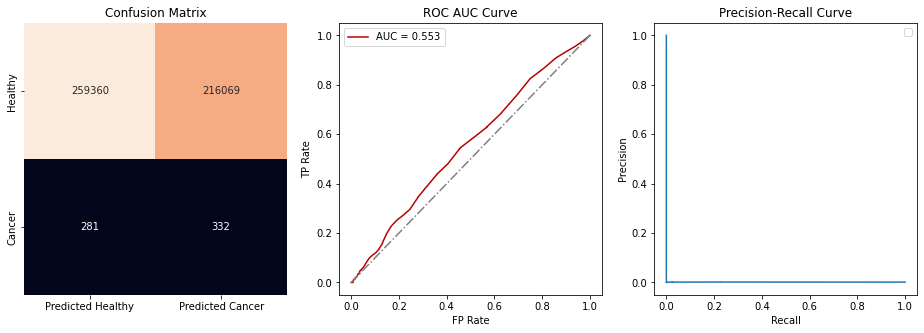

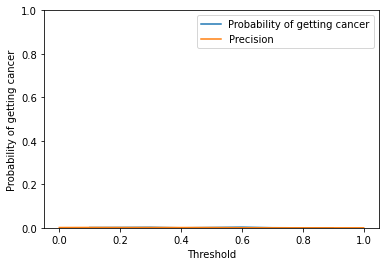

_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.006688772235065699


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.999922   | 7.4865e-05  | 0.999804   | 1          |
| recall__class_0    | 0.905505   | 0.0107917   | 0.890052   | 0.926638   |
| f1-score__class_0  | 0.950343   | 0.00591374  | 0.941828   | 0.961834   |
| precision__class_1 | 0.00724956 | 0.000834618 | 0.00612245 | 0.00857449 |
| recall__class_1    | 0.907407   | 0.0899592   | 0.75       | 1          |
| f1-score__class_1  | 0.0143818  | 0.00164199  | 0.0121457  | 0.0169851  |
| accuracy           | 0.905506   | 0.0107366   | 0.89013    | 0.92652    |
| auc                | 0.959711   | 0.032114    | 0.876707   |

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


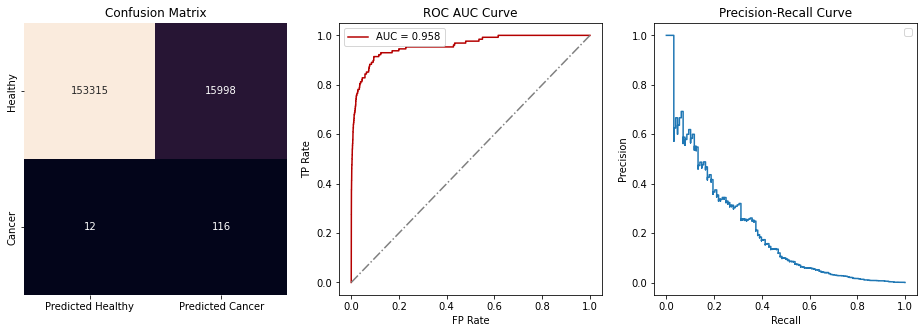

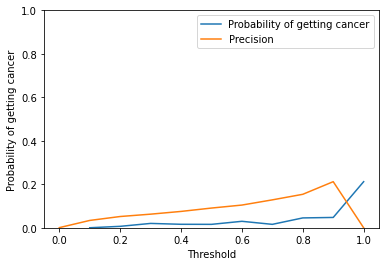

_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.012955944985151291


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999863  | 9.20028e-05 | 0.999722   | 1         |
| recall__class_0    | 0.945182  | 0.00841873  | 0.929912   | 0.958363  |
| f1-score__class_0  | 0.971736  | 0.00442503  | 0.963683   | 0.978606  |
| precision__class_1 | 0.0114554 | 0.00198479  | 0.00818554 | 0.0149813 |
| recall__class_1    | 0.828704  | 0.118512    | 0.625      | 1         |
| f1-score__class_1  | 0.0225876 | 0.00386972  | 0.0161943  | 0.0294659 |
| accuracy           | 0.945094  | 0.00835595  | 0.929962   | 0.95813   |
| auc                | 0.948676  | 0.0496898   | 0.814505   | 0.998568  |
+-------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


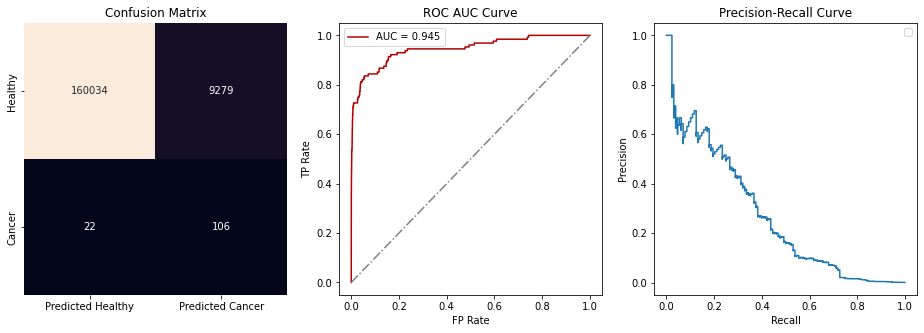

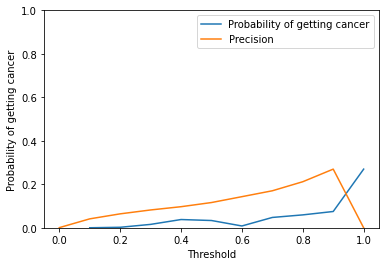

_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.030599376186728477


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.999752   | 0.000167924 | 0.999298   | 1          |
| recall__class_0    | 0.875046   | 0.0163891   | 0.840212   | 0.89823    |
| f1-score__class_0  | 0.933174   | 0.00935965  | 0.913081   | 0.946256   |
| precision__class_1 | 0.00429894 | 0.00181418  | 0.001514   | 0.00819672 |
| recall__class_1    | 0.706907   | 0.172659    | 0.461538   | 1          |
| f1-score__class_1  | 0.00853908 | 0.00358537  | 0.00301887 | 0.0162382  |
| accuracy           | 0.874922   | 0.0163095   | 0.840177   | 0.898074   |
| auc                | 0.864285   | 0.0702289   | 0.748504   | 0.9787

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


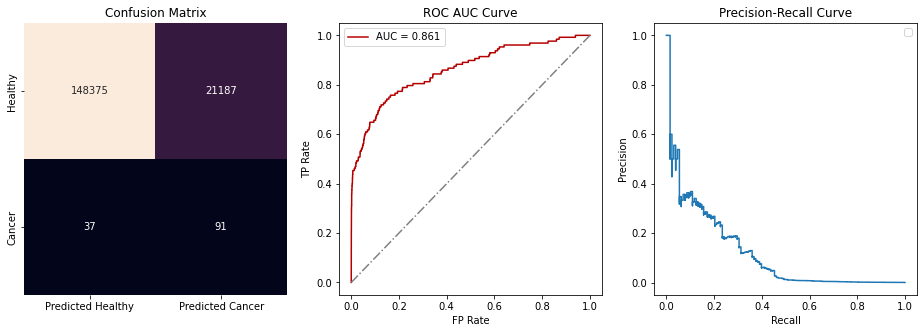

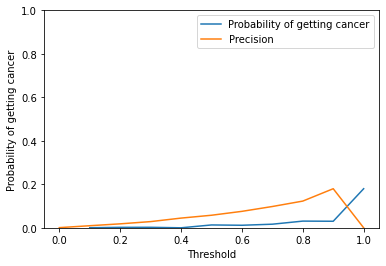

_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.02924666740000248


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.999714   | 0.000132617 | 0.999504   | 0.999899   |
| recall__class_0    | 0.884576   | 0.0130866   | 0.861084   | 0.904154   |
| f1-score__class_0  | 0.938579   | 0.00734292  | 0.925225   | 0.949444   |
| precision__class_1 | 0.00444089 | 0.00206032  | 0.00132979 | 0.00824931 |
| recall__class_1    | 0.654094   | 0.145564    | 0.333333   | 0.888889   |
| f1-score__class_1  | 0.00881261 | 0.00406535  | 0.00265252 | 0.0162896  |
| accuracy           | 0.884407   | 0.0130145   | 0.860929   | 0.903831   |
| auc                | 0.847018   | 0.0630376   | 0.716336   | 0.94201

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


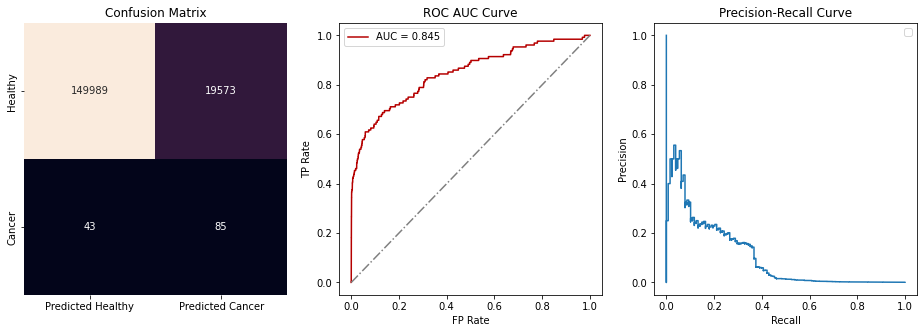

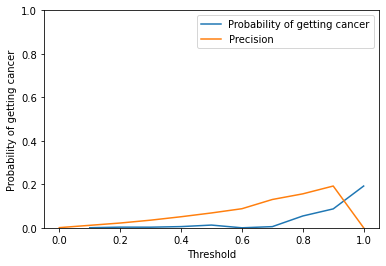

_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.2970585823059082


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999099   | 0.000298581 | 0.998648   | 0.999632  |
| recall__class_0    | 0.514274   | 0.0183314   | 0.486948   | 0.547892  |
| f1-score__class_0  | 0.678845   | 0.0159123   | 0.654796   | 0.707602  |
| precision__class_1 | 0.00168437 | 0.000312519 | 0.0011853  | 0.0022569 |
| recall__class_1    | 0.637398   | 0.12933     | 0.45       | 0.853659  |
| f1-score__class_1  | 0.00335985 | 0.000623526 | 0.00236438 | 0.0045019 |
| accuracy           | 0.514433   | 0.0182001   | 0.487233   | 0.547783  |
| auc                | 0.587781   | 0.080115    | 0.429894   | 0.707971  |
+----

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


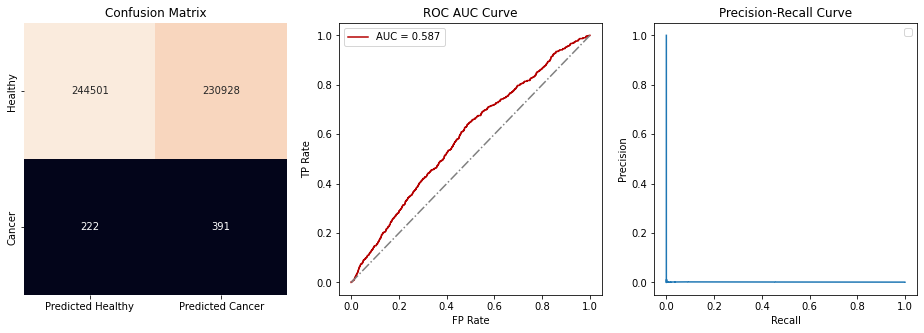

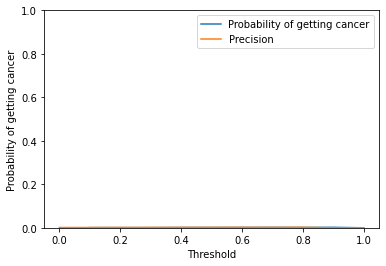

_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials
Threshold: 0.3203369379043579


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.998989   | 0.000230907 | 0.998664   | 0.999365   |
| recall__class_0    | 0.600599   | 0.0165232   | 0.565894   | 0.630253   |
| f1-score__class_0  | 0.750057   | 0.0128769   | 0.722528   | 0.772839   |
| precision__class_1 | 0.00169118 | 0.000339071 | 0.00122609 | 0.00225383 |
| recall__class_1    | 0.526585   | 0.11667     | 0.365854   | 0.707317   |
| f1-score__class_1  | 0.00337152 | 0.000676171 | 0.00244399 | 0.00449334 |
| accuracy           | 0.600504   | 0.0164054   | 0.565919   | 0.629976   |
| auc                | 0.583887   | 0.0682529   | 0.485973   | 0.68935

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


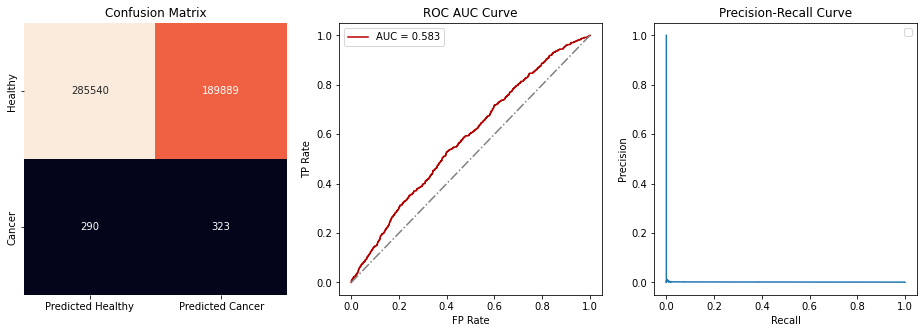

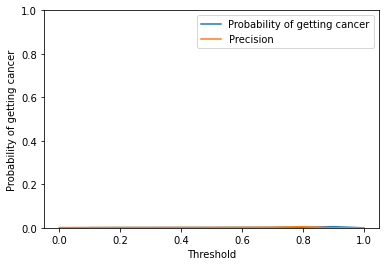

In [5]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    threshold = cv_analytics_util.get_optimal_operating_point()
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    label = cv_analytics_util.get_label()
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    per_thereshold_metrics = get_per_thereshold_metrics(full_dataset, f'{label}_prob', label, thresholds = np.linspace(0, 1, 11))
    per_thereshold_metrics['bucket_positives'] = per_thereshold_metrics['True_Positive'].diff().abs()
    per_thereshold_metrics['bucket_negatives'] = per_thereshold_metrics['False_Positive'].diff().abs()
    per_thereshold_metrics['per_bucket_probability'] = per_thereshold_metrics['bucket_positives'] / (per_thereshold_metrics['bucket_positives'] + per_thereshold_metrics['bucket_negatives'])
    title = ""
    x = per_thereshold_metrics['Threshold']
    y = per_thereshold_metrics['per_bucket_probability']
    plt.plot(x, y, label="Probability of getting cancer")
    y = per_thereshold_metrics['Precision']
    plt.plot(x, y, label="Precision")
    plt.ylabel("Probability of getting cancer")
    plt.xlabel("Threshold")
    plt.title(title)
    plt.ylim([0, 1])
    plt.legend()
    plt.show()




Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999663 | 0.000126079 | 0.999467  | 0.999823 |
| recall__class_0    | 0.996993 | 0.000786017 | 0.99548   | 0.997871 |
| f1-score__class_0  | 0.998326 | 0.000420209 | 0.997558  | 0.998846 |
| precision__class_1 | 0.129045 | 0.0546217   | 0.0576923 | 0.225806 |
| recall__class_1    | 0.552778 | 0.172133    | 0.25      | 0.777778 |
| f1-score__class_1  | 0.20799  | 0.0832824   | 0.1       | 0.35     |
| accuracy           | 0.996659 | 0.000837308 | 0.995129  | 0.997695 |
| auc                | 0.943784 | 0.0440374   | 0.865928  | 0.998103 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


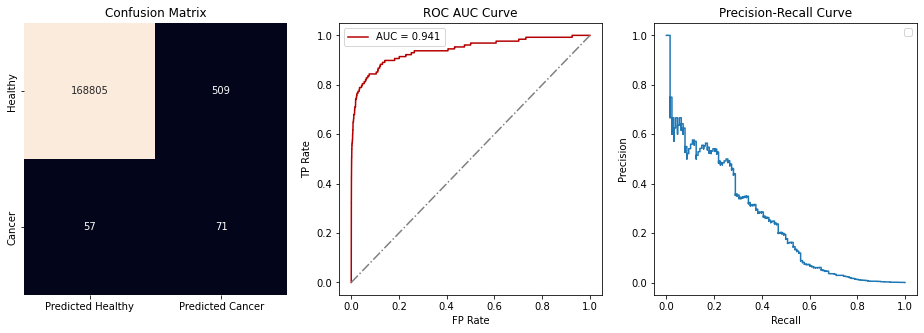

In [6]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999538  | 0.000231329 | 0.999016 | 0.999823 |
| recall__class_0    | 0.996637  | 0.000857611 | 0.995399 | 0.998152 |
| f1-score__class_0  | 0.998085  | 0.000428087 | 0.997233 | 0.998767 |
| precision__class_1 | 0.0835833 | 0.0602229   | 0        | 0.176471 |
| recall__class_1    | 0.38277   | 0.241106    | 0        | 0.777778 |
| f1-score__class_1  | 0.133621  | 0.0912577   | 0        | 0.285714 |
| accuracy           | 0.996179  | 0.00085284  | 0.994482 | 0.997538 |
| auc                | 0.825113  | 0.109238    | 0.649522 | 0.982172 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


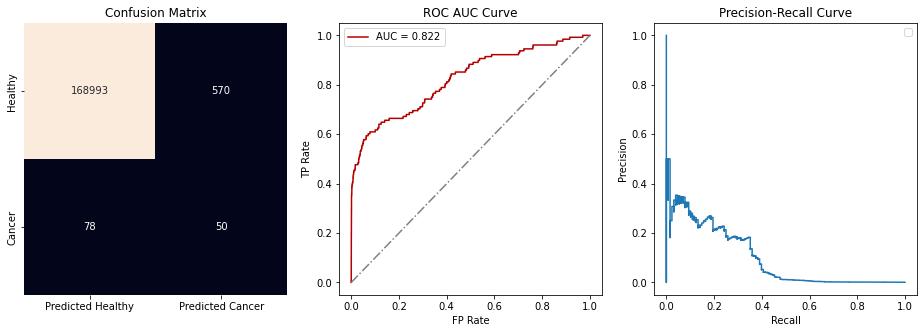

In [7]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [8]:
single_cv_analytics_util.merge_in_dataset(get_screened_first_5_no_process_dataset(label = f'cancer_in_next_1_years'))

Added new records: 249


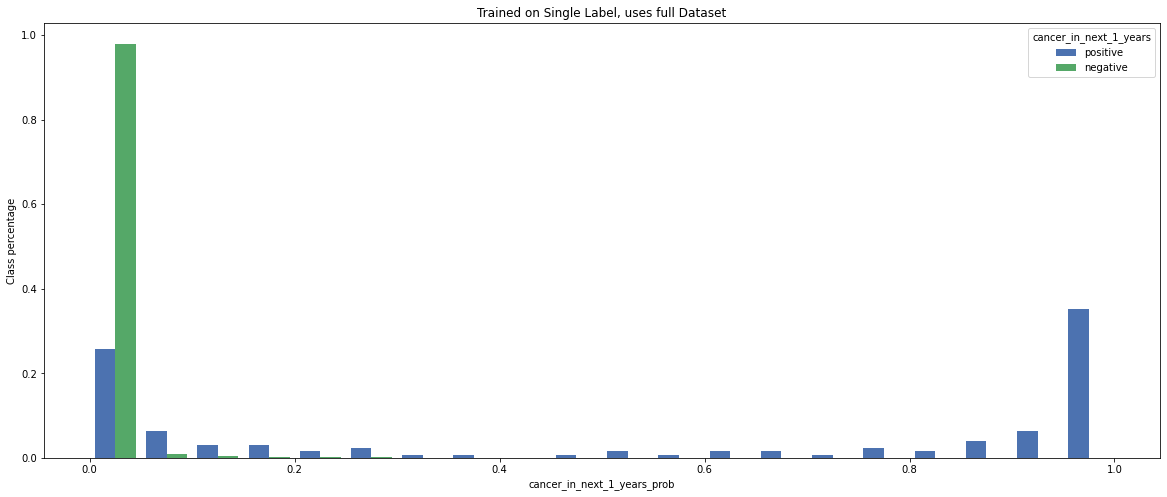

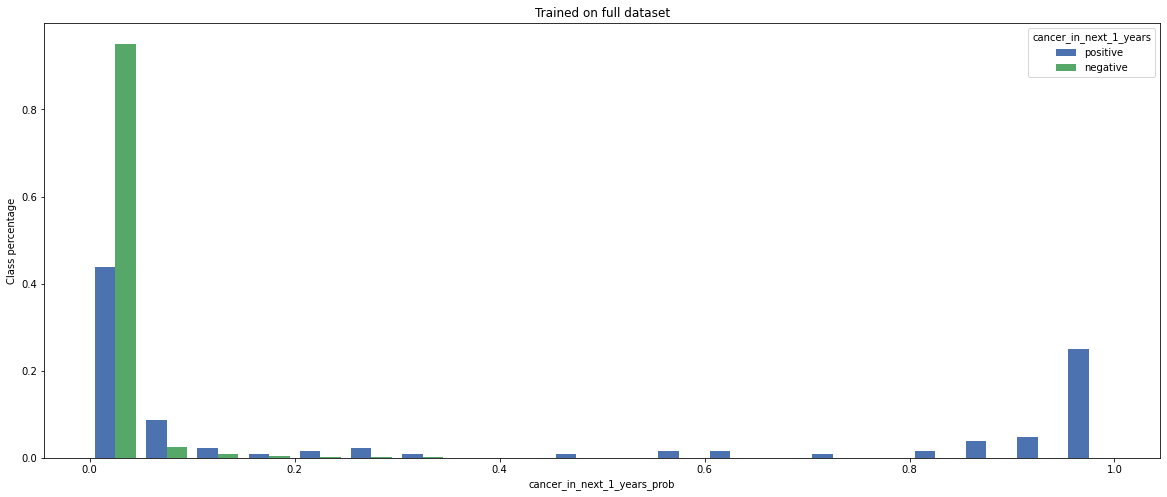

In [9]:

full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on Single Label, uses full Dataset')
full_dataset = cv_analytics_util.get_dataset_with_predictions()
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', num_bins = 20, normalize = True, title='Trained on full dataset')

# full_dataset = single_cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Trained on Single Label, uses full Dataset')
# full_dataset = cv_analytics_util.get_dataset_with_predictions()
# plot_hist_side_by_side_for_class(full_dataset, 'ovar_cancer', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')